In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [2]:
# Read the csv file in this folder to a dataframe. The file is calle "kepler.csv"
df = pd.read_csv("attrition_data.csv")

df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


## Histogram

In [13]:
# Show me the different values of the column "EducationField"

df["EducationField"].unique()

# Show me the count of the different values of the column "EducationField"

df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<Axes: title={'center': 'Other'}, ylabel='Density'>

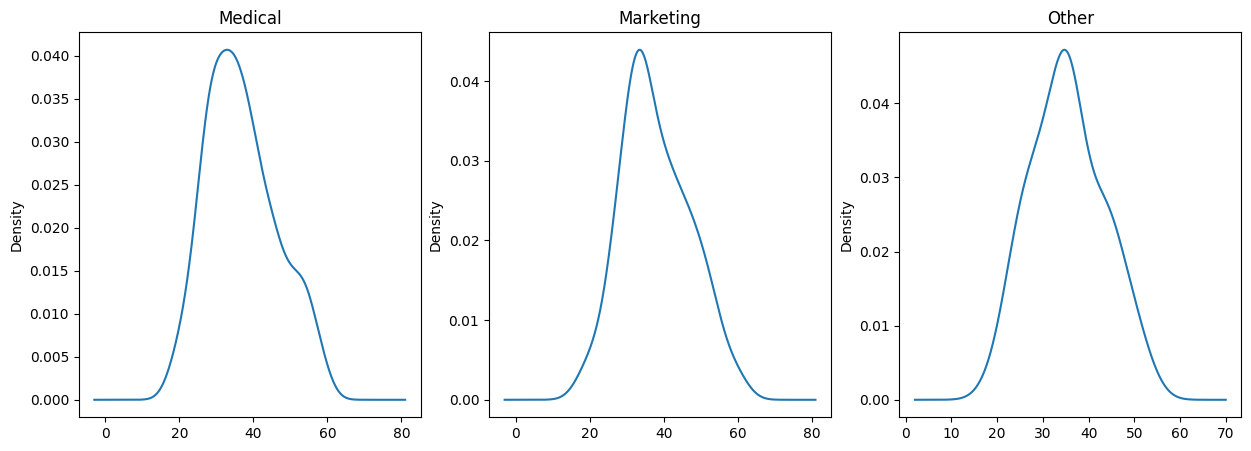

In [14]:
# Filter the dataframe by the values of column'MaritalStatus'

df_medical = df[df['EducationField'] == 'Medical']
df_marketing = df[df['EducationField'] == 'Marketing']
df_other = df[df['EducationField'] == 'Other']



# Draw three suplots one per each value of 'MaritalStatus' and plot the density of the column 'Age'

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
df_medical['Age'].plot(kind='density', ax=ax[0], title='Medical')
df_marketing['Age'].plot(kind='density', ax=ax[1], title='Marketing')
df_other['Age'].plot(kind='density', ax=ax[2], title='Other')


## Boxplot

Text(0.5, 1.0, 'Other')

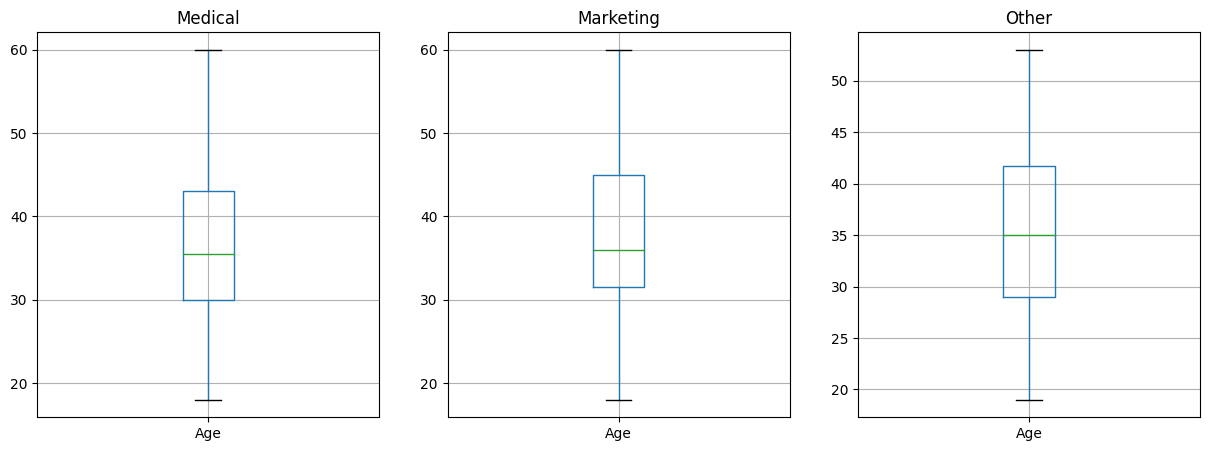

In [5]:
# Draw three subplots of type boxplot one per each value of 'MaritalStatus' and plot the column 'Age'

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
df_medical.boxplot(column='Age', ax=ax[0])
ax[0].set_title('Medical')
df_marketing.boxplot(column='Age', ax=ax[1])
ax[1].set_title('Marketing')
df_other.boxplot(column='Age', ax=ax[2])
ax[2].set_title('Other')



Según el boxplot, la distribución es simétrica, ya que las dos colas son iguales.

## Describe

In [6]:
# Print the describe for each subdataframe and the median for each one by Age

print('Medical')

print(df_medical['Age'].describe())


print('Marketing')

print(df_marketing['Age'].describe())



print('Other')

print(df_other['Age'].describe())


Medical
count    464.000000
mean      36.838362
std        9.481012
min       18.000000
25%       30.000000
50%       35.500000
75%       43.000000
max       60.000000
Name: Age, dtype: float64
Marketing
count    159.000000
mean      37.924528
std        9.153783
min       18.000000
25%       31.500000
50%       36.000000
75%       45.000000
max       60.000000
Name: Age, dtype: float64
Other
count    82.000000
mean     35.365854
std       7.946600
min      19.000000
25%      29.000000
50%      35.000000
75%      41.750000
max      53.000000
Name: Age, dtype: float64


Según el describe, la media es 36.92, la mediana es 36, el mínimo es 18 y el máximo es 60. La distribución es simétrica, ya que la media y la mediana son muy parecidas.

## QQplot

Text(0.5, 1.0, 'Other')

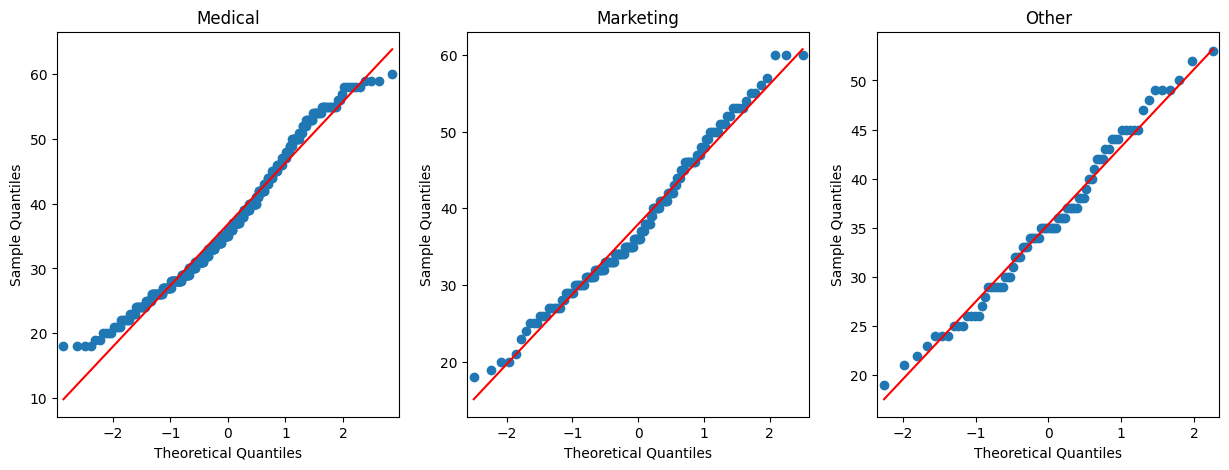

In [7]:
import statsmodels.api as sm

# Draw three subplots of type qqplot one per each value of 'MaritalStatus' and plot the column 'Age'

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sm.qqplot(df_medical['Age'], line='s', ax=ax[0])
ax[0].set_title('Medical')
sm.qqplot(df_marketing['Age'], line='s', ax=ax[1])
ax[1].set_title('Marketing')
sm.qqplot(df_other['Age'], line='s', ax=ax[2])
ax[2].set_title('Other')

Según el QQ-plot, la distribución simétrica, ya que la mayoría de los puntos están cerca de la recta.

## Asimetría y Kurtosis

In [8]:
# Print the kurtosis and skewness for each subdataframe by Age

print('Medical')
print("Kurtosis", stats.kurtosis(df_medical["Age"]))
print("Skewness", stats.skew(df_medical["Age"]))
print('\n')

print('Marketing')
print("Kurtosis", stats.kurtosis(df_medical["Age"]))
print("Skewness", stats.skew(df_medical["Age"]))
print('\n')


print('Other')
print("Kurtosis", stats.kurtosis(df_other["Age"]))
print("Skewness", stats.skew(df_other["Age"]))


Medical
Kurtosis -0.5407140463019129
Skewness 0.4007435370754935


Marketing
Kurtosis -0.5407140463019129
Skewness 0.4007435370754935


Other
Kurtosis -0.6576266874771921
Skewness 0.1777279685911767


Según los valores de asimetría y kurtosis, la distribución es simétrica, ya que los valores son muy parecidos a 0.

## Contraste de Hipótesis

In [9]:
# Give me the shapiro test for each subdataframe by Age

print('Medical')
shapiro_test, p_value = stats.shapiro(df_medical["Age"])
print(f"Estatístico de prueba: {shapiro_test}, p-value: {p_value}")
print('\n')

print('Marketing')
shapiro_test, p_value = stats.shapiro(df_marketing["Age"])
print(f"Estatístico de prueba: {shapiro_test}, p-value: {p_value}")
print('\n')

print('Other')
shapiro_test, p_value = stats.shapiro(df_other["Age"])
print(f"Estatístico de prueba: {shapiro_test}, p-value: {p_value}")

Medical
Estatístico de prueba: 0.9738271832466125, p-value: 2.2070088334658067e-07


Marketing
Estatístico de prueba: 0.9805779457092285, p-value: 0.024550719186663628


Other
Estatístico de prueba: 0.9810986518859863, p-value: 0.2690286934375763


Según el shape test, la distribución no es simétrica, ya que el p-value es menor que 0.05.

In [10]:
# Give me the normaltest for each subdataframe by Age

print('Medical')
k2, p_value = stats.normaltest(df_medical['Age'])
print(f"Estatístico de prueba: {k2}, p-value: {p_value}")
print('\n')

print('Marketing')
k2, p_value = stats.normaltest(df_marketing['Age'])
print(f"Estatístico de prueba: {k2}, p-value: {p_value}")
print('\n')

print('Other')
k2, p_value = stats.normaltest(df_other['Age'])
print(f"Estatístico de prueba: {k2}, p-value: {p_value}")

Medical
Estatístico de prueba: 21.951375222468364, p-value: 1.7112735403146025e-05


Marketing
Estatístico de prueba: 4.387268654244352, p-value: 0.11151074476469593


Other
Estatístico de prueba: 2.729178899877779, p-value: 0.2554855440655358


# Estimacion puntual de la edad media de la población comparada con la edad media de las muestras